<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/4_Autofunciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterización de sistemas en el dominio del tiempo y la transformada de Laplace

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Eigenfunctions - Autofunciones

- Una [autofunción](https://en.wikipedia.org/wiki/Eigenfunction) (También llamada función propia) de un sistema se define como la señal de entrada $x(t)$ que produce la señal de salida $y(t)=\mathscr{H} \{x(t)\}=\lambda \cdot x(t)$ con $\lambda \in \mathbb{C}$.

- El peso $\lambda$ asociado con $x(t)$ se conoce como valor propio escalar del sistema. Por lo tanto, además de ser un factor de ponderación, una función propia no se modifica al pasar por el sistema.

- Las señales exponenciales complejas $e^{st}$ con $s \in \mathbb{C}$ son funciones propias de un sistema lineal e invariante en el tiempo (SLIT). Esto se puede probar al aplicar las propiedades de los SLIT.

- Se asume un SLIT generalizado con entrada $x(t) = e^{s t}$ y salida $y(t) = \mathscr{H}\{ x(t) \}$. La respuesta del SLIT ante una entrada desplazada $x(t-\tau) = e^{s (t-\tau)}$ es

\begin{equation}
y(t - \tau) = \mathscr{H}\{ x(t-\tau) \} = \mathscr{H}\{ e^{-s \tau} \cdot e^{s t}  \}
\end{equation}

- Debido a la linealidad del sistema, la anterior igualdad se puede reformular así:

\begin{equation}
y(t - \tau) =  e^{-s \tau} \cdot \mathscr{H}\{ e^{s t}  \} = e^{-s \tau} \cdot y(t)
\end{equation}

- Por ende $y(t)=\lambda e^{st} $, con $\lambda = e^{-\tau s}$.

**Ejemplo**

Se considera un SLIT cuya relación entrada/salida viene dada por la siguiente ecuación diferencial ordinaria (EDO) con coeficientes constantes:

\begin{equation}
a_0 y(t) + a_1 \frac{d y(t)}{dt} + a_2 \frac{d^2 y(t)}{dt^2} = x(t)
\end{equation}

Con $a_i \in \mathbb{R} \quad \forall i$.

La señal de salida $y(t)$ del sistema se calcula mediante la solución explícita de la EDO para $x(t)=e^{st}$ como señal de entrada. Las constantes de integración se descartan para facilitar la ilustración.

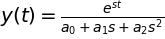

In [ ]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#definir variables
t, s, a0, a1, a2 = sym.symbols('t s a:3')
x = sym.exp(s * t)#entrada del sistema tipo euler compleja
y = sym.Function('y')(t)
#plantear EDO
ode = sym.Eq(a0*y + a1*y.diff(t) + a2*y.diff(t,2), x)
solution = sym.dsolve(ode)#resolver para condiciones iniciales 0
solution.subs({'C1': 0, 'C2' : 0})

**Ejercicio**

* Qué relación tiene $\lambda$ con el la salida obtenida al resolver la EDO?
* Puede generalizar sus resultados a una EDO de orden arbitrario?

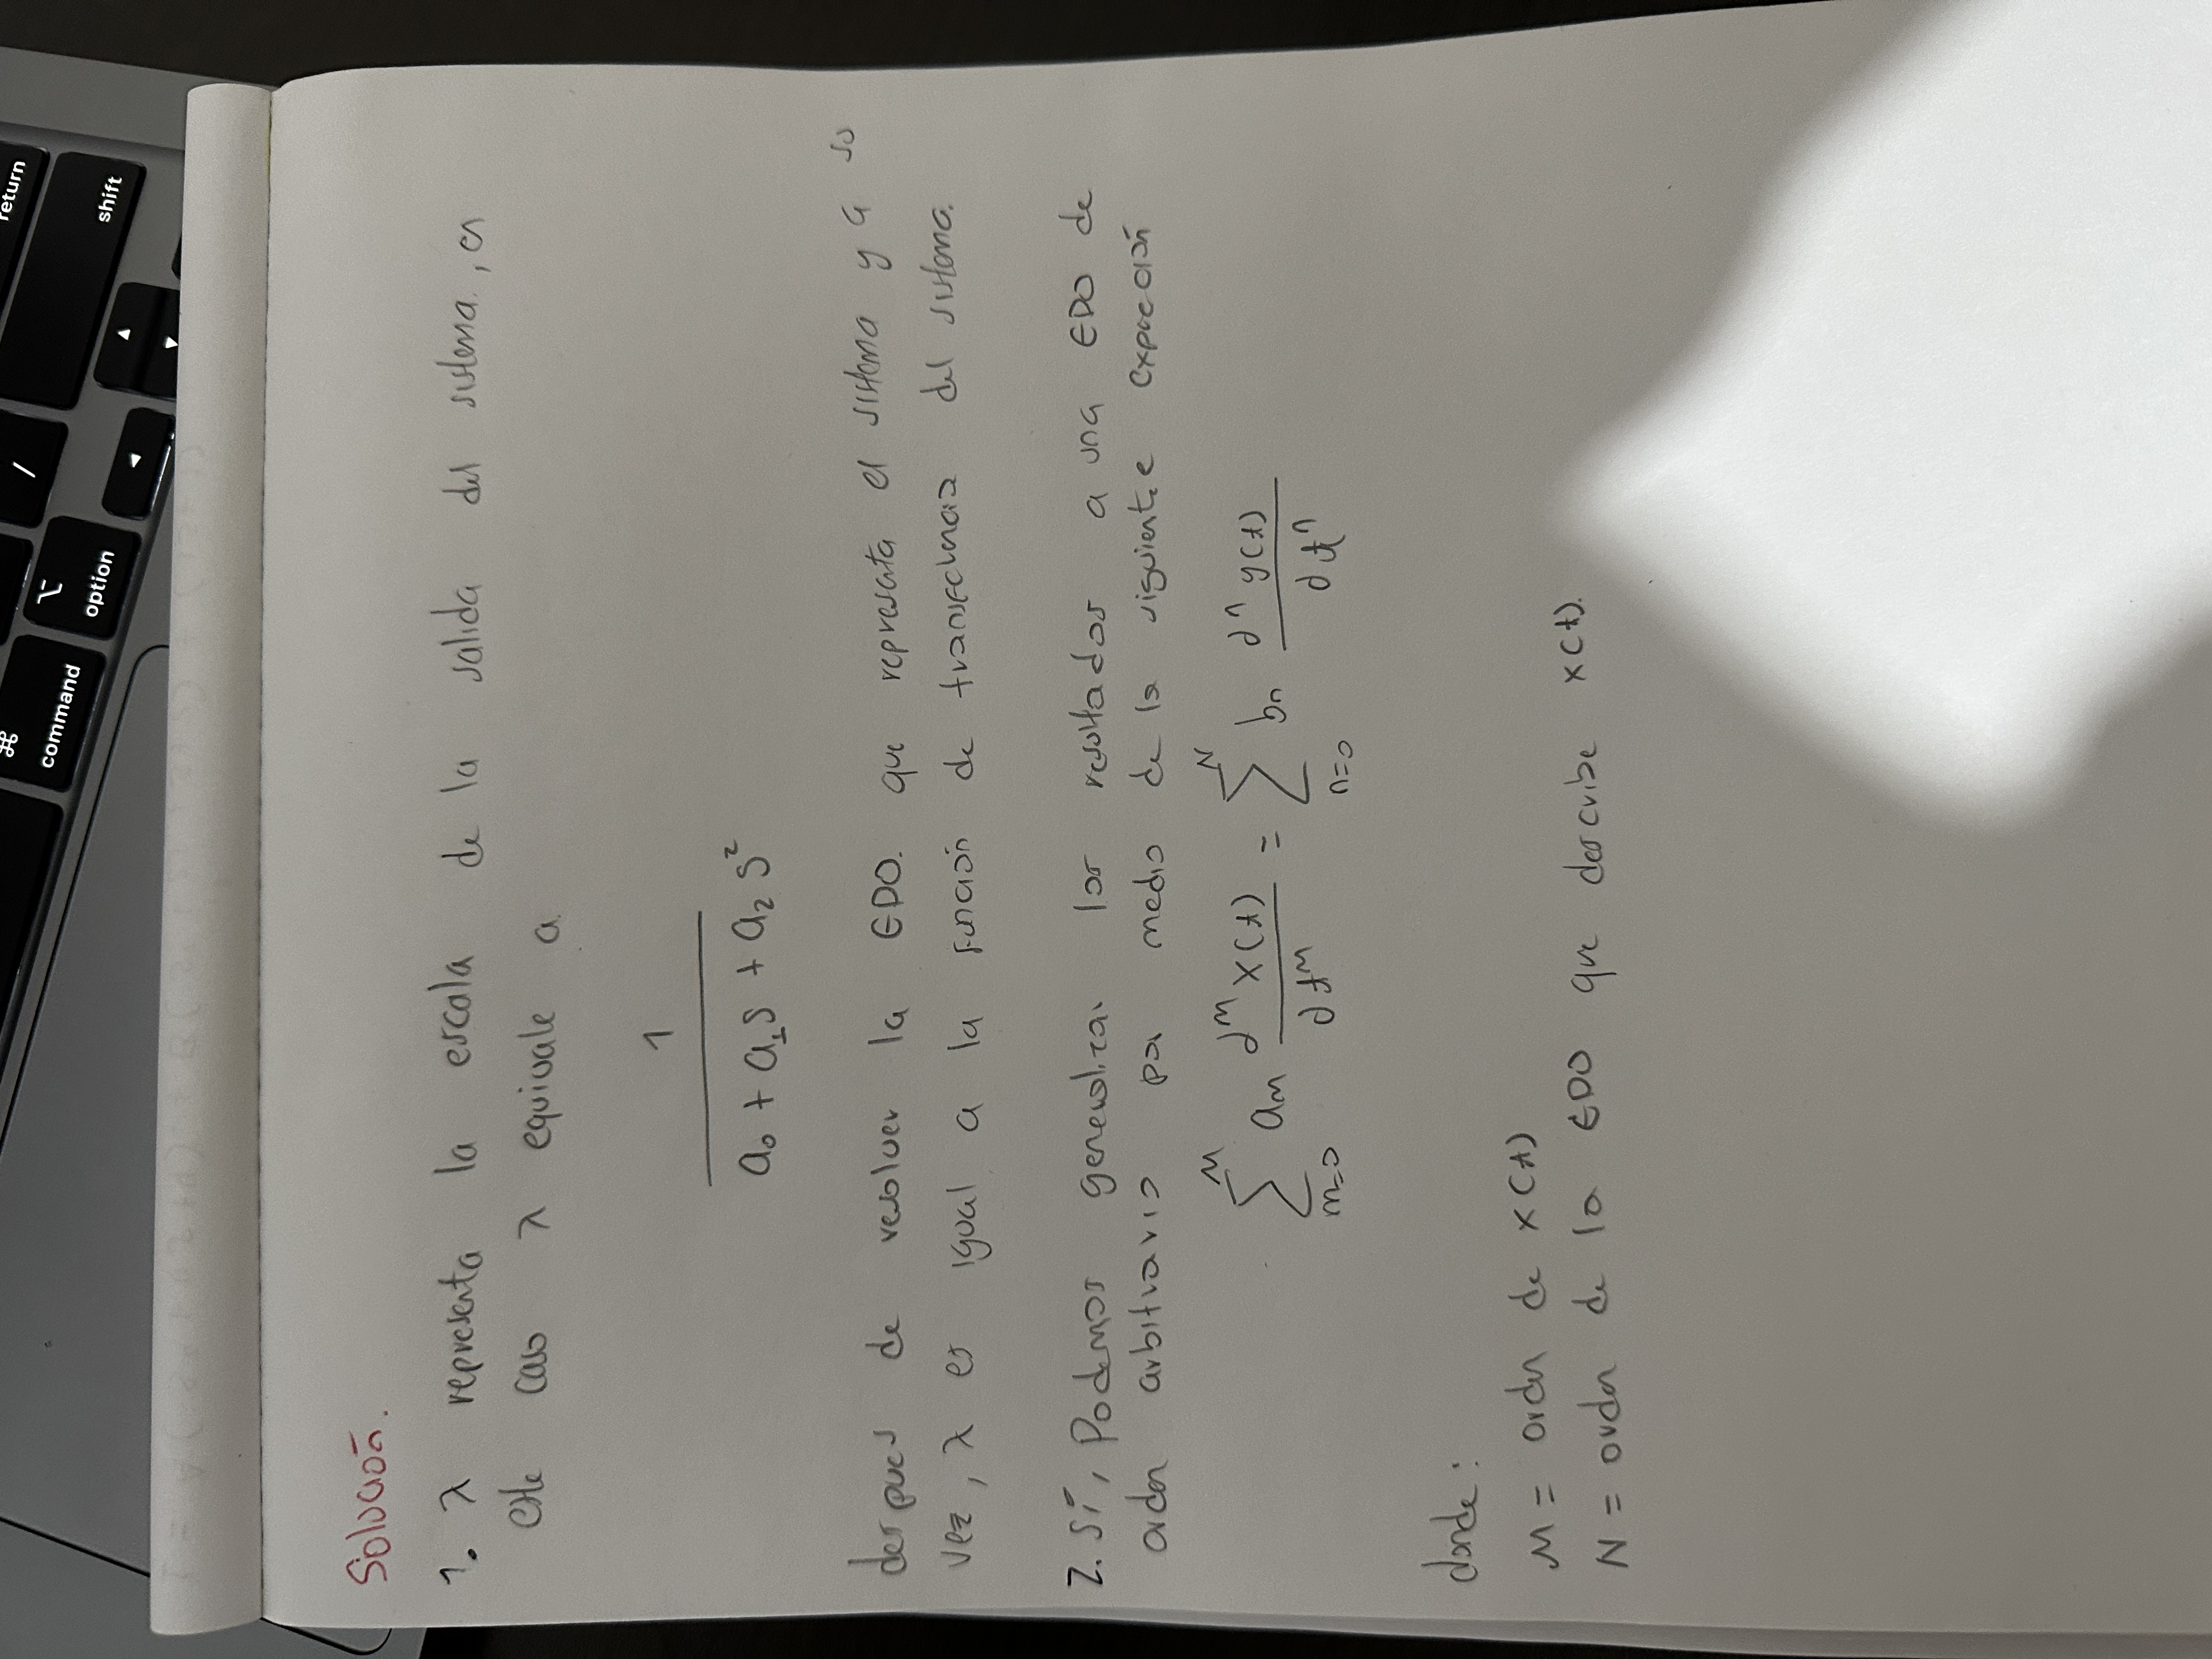

**Ejemplo**

La siguiente EDO lineal con coeficiente dependiente del tiempo se considera como un ejemplo para un sistema lineal con variación en el tiempo:

\begin{equation}
t \cdot \frac{d y(t)}{dt} = x(t)
\end{equation}

La señal de salida $y(t)$ del sistema para una señal exponencial compleja en la entrada $x(t)=e^{st}$ se calcula al solucionar de manera explícita la EDO. Nuevamente se descartan las constantes de integración.

In [ ]:
ode = sym.Eq(t*y.diff(t), x)
solution = sym.dsolve(ode)
solution.subs('C1', 0)

Observe que, $\text{Ei}(\cdot)$ denota una [integral exponencial](http://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.Ei). La respuesta $y(t)$ del sistema variante en el tiempo no es igual a una señal exponencial compleja ponderada ($\lambda \cdot e^{st}$). Se puede concluir que las exponenciales complejas no son funciones propias de este sistema particular.

**Ejemplo**

Un último ejemplo considera la siguiente EDO no lineal con coeficientes:

\begin{equation}
\left( \frac{d y(t)}{dt} \right)^2 = x(t)
\end{equation}

Como ejemplo para un sistema no lineal e invariante en el tiempo. Nuevamente, la señal de salida $y(t)$ del sistema ante una señal exponencial compleja en la entrada $x(t)=e^{st}$ se calcula mediante la solución explícita de la EDO. Como antes, las constantes de integración se descartan.

In [ ]:
ode = sym.Eq(y.diff(t)**2, x)
solution = sym.dsolve(ode)
solution[0].subs('C1',0)

        ⎛⎧     ______           ⎞
        ⎜⎪    ╱  s⋅t            ⎟
        ⎜⎪2⋅╲╱  ℯ               ⎟
y(t) = -⎜⎨───────────  for s ≠ 0⎟
        ⎜⎪     s                ⎟
        ⎜⎪                      ⎟
        ⎝⎩     t       otherwise⎠

Obviamente, para este sistema no lineal, las señales exponenciales complejas no son funciones propias.

## Función de Transferencia

El valor propio complejo $\lambda$ caracteriza las propiedades de la transferencia de una señal exponencial compleja $e^{st} $ con una frecuencia compleja $s$ a través de un SLTI.

Se denomina comúnmente como [*función de transferencia*](https://en.wikipedia.org/wiki/Transfer_function) y se denota por $H(s)=\lambda(s)$. Usando esta definición, la señal de salida $y(t)$ de un SLIT ante una señal exponencial compleja en la entrada, se tiene que

\begin{equation}
y(t) = \mathscr{H} \{ e^{st} \} = H(s) \cdot e^{st}
\end{equation}

Tenga en cuenta que el concepto de función de transferencia está directamente vinculado a la linealidad y la invariancia en el tiempo de un sistema. Solo en este caso, las señales exponenciales complejas son funciones propias del sistema y $H(s)$ describe las propiedades de un SLIT con respecto a éstas.

La ecuación anterior se puede reescribir en términos de la magnitud $|H(s)|$ y fase $\varphi(s)=\arg\{H(s)\}$ de la función de transferencia compleja $H(s)$

\begin{equation}
y(t) = | H(s) | \cdot e^{s t + j \varphi(s)}
\end{equation}

La magnitud $|H(s)|$ proporciona una atenuación dependiente de la frecuencia de la función propia $e^{st}$ por el sistema, mientras que $\varphi(s)$ proporciona el cambio de fase introducido en la señal de entrada.

## Relación entre función de transferencia y respuesta al impulso

Para establecer la relación entre la función de transferencia $H(s)$ y la respuesta al impulso $h(t)$, se obtiene la salida $y(t)=\mathscr{H}\{x(t)\}$ de un SLIT con señal de entrada $x(t)$, mediante la convolución de la señal de entrada con la respuesta de impulso:

\begin{equation}
y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(t-\tau) \cdot h(\tau) \; d\tau
\end{equation}

Para una señal exponencial compleja como entrada $x(t)=e^{st}$, la salida de un SLIT se cálcula como $y(t)=\mathscr{H} \{e^{st}\}=H(s)\cdot e^{st}$.

Introduciendo ambas señales en la convolución se tiene que:

\begin{equation}
H(s) \cdot e^{st} = \int_{-\infty}^{\infty} e^{st} e^{-s \tau} \cdot h(\tau) \; d\tau
\end{equation}

Que después de reorganizar los términos resulta en

\begin{equation}
H(s) = \int_{-\infty}^{\infty} h(\tau) \cdot e^{-s \tau}  \; d\tau
\end{equation}

bajo el supuesto de que la integral converge.

La función de transferencia $H(s)$ se puede calcular a partir de la respuesta de impulso $h(t)$ mediante la integración de la respuesta de impulso multiplicada por la función exponencial compleja $e^{-st}$.

Esto constituye una transformada integral de la respuesta al impulso, la [transformada de Laplace](https://en.wikipedia.org/wiki/Laplace_transform).

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.